In [1]:
#pip install pandas-datareader

## What is CPI?

CPI is an economic tool which measures the prices paid monthly by consumers for a basket of goods. The inflation rate between any two time periods is measured by percantage changes in the price index. It is generally released on a yearly basis. If the price of a good was 1 dollar and then it increased to 1.01 dollars then we say inflation is 1%.

In [4]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [5]:

start_date = "1950-01-01"
end_date = "2023-01-23"

cpi = pdr.DataReader("CPIAUCSL","fred",start_date,end_date)

In [6]:
cpi.tail()

,CPIAUCSL
DATE,
2022-09-01,296.421
2022-10-01,297.979
2022-11-01,298.708
2022-12-01,298.808
2023-01-01,300.456


In [7]:
count_nan = cpi["CPIAUCSL"].isnull().sum()

print("Number of NaN values in the CPI dataframe:" + str(count_nan))

Number of NaN values in the CPI dataframe:0


In [8]:
#converting CPI into a year on year measure
cpi = cpi.pct_change(periods=12,axis=0)*100

cpi = cpi.dropna()

In [9]:
cpi.describe()

,CPIAUCSL
count,865.000000
mean,3.571931
std,2.844857
min,-1.958761
25%,1.666667
50%,2.848576
75%,4.477612
max,14.592275


The mean of the dataset is :2.494528248079754 %


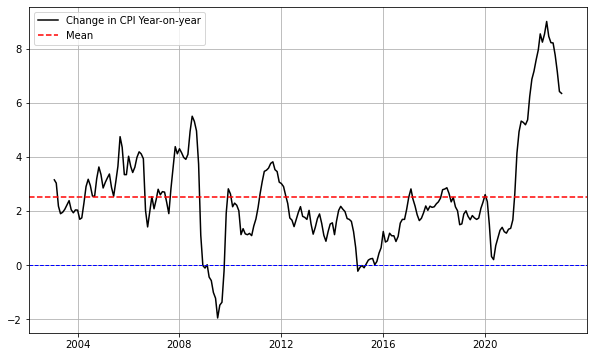

In [10]:
#lets create a plot to understand the table above

cpi_latest = cpi[-240:] # cpi over 20 years

mean = cpi_latest["CPIAUCSL"].mean()

print("The mean of the dataset is :" +str(mean),'%')

plt.figure(figsize=(10,6))

plt.plot(cpi_latest,color = "black",linewidth = 1.5,
        label = "Change in CPI Year-on-year")

plt.axhline(y=mean,color = "red",linestyle = "dashed",label = "Mean")

plt.axhline(y = 0,color = "blue",linestyle = "dashed",linewidth=1) #0 treshold

plt.grid()
plt.legend()
plt.show()

The median of the data set is :2.127414446442699 %


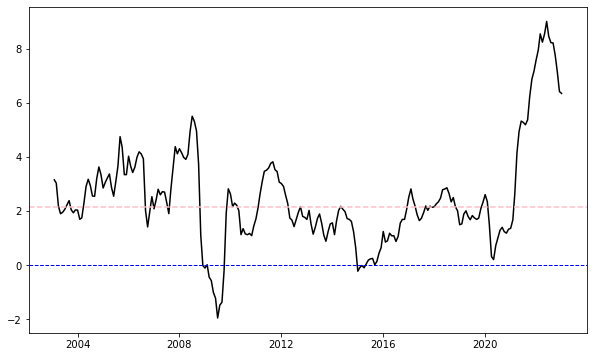

In [11]:
#lets also look for the median

median = cpi_latest["CPIAUCSL"].median()

print("The median of the data set is :" +str(median),'%')

plt.figure(figsize=(10,6))
plt.plot(cpi_latest,color = "black",linewidth = 1.5,label = "Change in CPI year on year")

plt.axhline(y=median,color = "pink",linestyle="dashed",label = "Median")
plt.axhline(y=0,color = "blue",linestyle = "dashed",linewidth=1)

plt.show()

We concluded an important point about the central tendency measures which are mean and median. That measures are important because if nothing works we use those to predict the future values. Those are the basic predictors of the data. And here we see if the data has outliers then we should use median. Because it is more robust to outliers than mean.  

In [12]:
variance = cpi_latest["CPIAUCSL"].var()
variance


3.631638598544012

Our varience is 3.63, it shows us the volatility of the data but it is the square of units then we use at the beginning. So it is hard to interpret it, for this reason we use standard deviation; which is the squareroot of variance.

In [13]:
std = np.sqrt(variance)

std

1.905685860404073

In [14]:
#another measure of variability is range it is basically max - min

rangemetric = cpi_latest["CPIAUCSL"].max() - cpi_latest["CPIAUCSL"].min()
rangemetric

#we take a quick glance of the data with the help range

10.958059145685382

In [15]:
#lets take a look at the distribution of the CPI

skew = cpi_latest["CPIAUCSL"].skew()

print("The skew of the data set :" +str(skew))

The skew of the data set :1.17702126611868


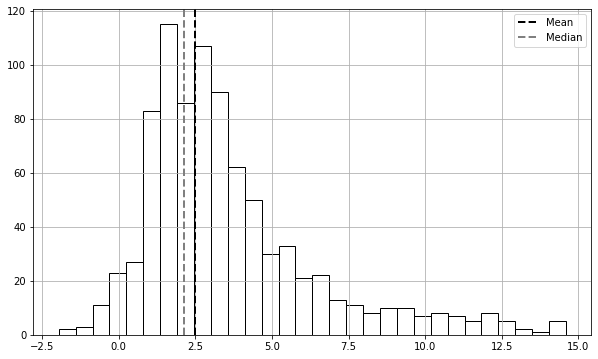

In [16]:


fig,ax = plt.subplots(figsize=(10,6))

ax.hist(cpi["CPIAUCSL"],bins = 30,edgecolor = "black", color = "white")

ax.axvline(mean,color = "black",linestyle="--",label = "Mean",linewidth=2)

ax.axvline(median,color = "grey",linestyle="--",label="Median",linewidth=2)
plt.grid()
plt.legend()
plt.show()

We can see there is a positive skewness also known as right-skewed. We can understand it by the skew is 1.17 positive and also median is less than mean, and it is before the mean as we see here in the graph.

In [17]:
#final descriptive statistics that we should take a look to understand data better is kurtosis

excess_kurtosis = cpi_latest["CPIAUCSL"].kurtosis()

print("The excess kurtosis of the data is :" +str(excess_kurtosis))

The excess kurtosis of the data is :2.168054557462154


The kurtosis shows if the data is distributer more flatten or not. In normal distribution we see values more like 3 and here is 2.16. Here we have a little bit leptokurtic, which is peakier with flatter tails, kurtosis.

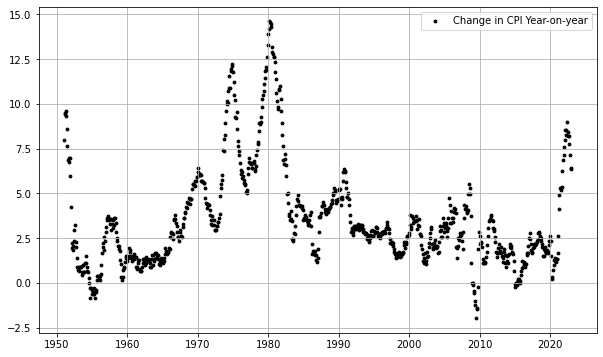

In [18]:
#now we will visualize the data with scatter plots

cpi_r = cpi.reset_index()

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(cpi_r["DATE"],cpi_r["CPIAUCSL"],color = "black",s=8,label = "Change in CPI Year-on-year")

plt.grid()
plt.legend()
plt.show()

In the table we see the change in CPI over years. But actually scatter plots are used to compare two different variables rather than dates. So we will take a look at between UK CPI rate too.

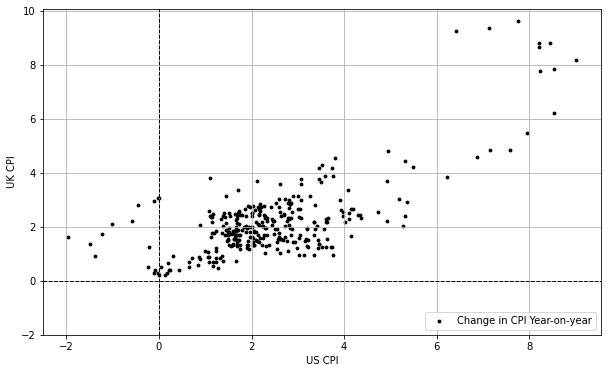

In [21]:
start_date = "1995-01-01"
end_date = "2022-12-01"

cpi_us = pdr.DataReader("CPIAUCSL","fred",start_date,end_date)
cpi_uk = pdr.DataReader("GBRCPIALLMINMEI","fred",start_date,end_date)

cpi_us= cpi_us.dropna()
cpi_uk = cpi_uk.dropna()

cpi_us = cpi_us.pct_change(periods = 12,axis = 0)*100
cpi_uk = cpi_uk.pct_change(periods=12,axis = 0)*100

fig,ax = plt.subplots(figsize = (10,6))

ax.scatter(cpi_us["CPIAUCSL"],cpi_uk["GBRCPIALLMINMEI"],color = "black",s = 8,label = "Change in CPI Year-on-year")


ax.set_xlabel("US CPI")
ax.set_ylabel("UK CPI")

ax.axvline(x=0,color = "black",linestyle = "dashed",linewidth=1)
ax.axhline(y = 0, color = "black",linestyle="dashed",linewidth=1)
ax.set_ylim(-2,)

plt.grid()
plt.legend()
plt.show()

From this plot we can say there is a positive correlation between CPI rates of UK and US, so as one of them increases (or decreases) other one will do the same thing.

Now we will look for correlation. It is an important part of deep learning and machine learning.

In [22]:
combined_cpi_data = pd.concat([cpi_us["CPIAUCSL"],cpi_uk["GBRCPIALLMINMEI"]],
                             axis = 1)

combined_cpi_data.corr(method="pearson")

,CPIAUCSL,GBRCPIALLMINMEI
CPIAUCSL,1.000000,0.732048
GBRCPIALLMINMEI,0.732048,1.000000


Pearson correlation is used with variables that have proportional changes and are normally distributed.

Spearman's rank correlation on the other hand is used for rank correlation that measures the strength of the relationship between variables. It is suitable for non-normal distribution.

In [23]:
combined_cpi_data.corr(method = "spearman")

,CPIAUCSL,GBRCPIALLMINMEI
CPIAUCSL,1.000000,0.472871
GBRCPIALLMINMEI,0.472871,1.000000


Here, the pearson is greater than speaerman so this basically means that our data is not not ranked. So the relationship of our data is linear, not ranked. But it also shows that our data has outliers at one of its tails of the distribution.


Another thing to look out for is **Autocorrelation** which is a statistical method used to look relationship between a given time and its lagged versions. Normally we wait to the closer lagged value has highest autocorrelation with given time.

We use it to predict future values in data like seasonality and trends. Positive correlation generally occur in trending assets and associated with the idea of trend following while negative correlation is more likely to exhibit in ranging markets and is associated with the idea of antipersistance; mean reversion.

**Antipersistance** : It is statistical property that shows a higher value is followed by a lower value or vice versa. Time series is reversing its direction more than random series. This may occur in some stock prices.

**Mean Reversion** : It is used in finance and basically it shows if a metric like price is significanty above of its long term average which is mean, will tend to go back its mean.


In [24]:
#looking the autocorrelaton of us data

cpi_ac = cpi_us.iloc[:,0]

print("Correlation with a lag of 1 = ",round(cpi_ac.autocorr(lag=1),2))

print("Correlation with a lag of 6 = ",round(cpi_ac.autocorr(lag=6),2))


print("Correlation with a lag of 12 = ",round(cpi_ac.autocorr(lag=12),2))

Correlation with a lag of 1 =  0.97
Correlation with a lag of 6 =  0.65
Correlation with a lag of 12 =  0.17


#### MIC Correlation

Maximal Information Coefficient(MIC) Correlation is a nonparametic measure of association between two variables. Unlike tradiaitonal measurements like Pearson or Spearmen it is designed to capture any type of functional or non-functional association.

Its range is between 0 and 1. 0 indicates there is no relation and 1 indicates that y = square of x or y = sin(x).

The MIC's core idea is to find the best possible way to find a scatter plot between x and y into a grid to maximize the **Mutual Information** between the binned variables.

**Process of MIC**

**Mutual Information (MI)** : It measures how much knowing the value of one of the variables reduces the uncertainty about the other. High MI means x tells a lot about y, so x is a snitch and we dont like- OK thats just a joke because i am a little bit off track and bored but you keep going.

**Binning and Grinding** : Algorithm overlays a grid onto the scatter plot. It tries many different grid solutions and find the best model.

**Maximization and Normalization** : For each grid MI scores are calculated and normalized. The main aim is to find the maximum value achieved by all grids.The maximum normalized value is the MIC.

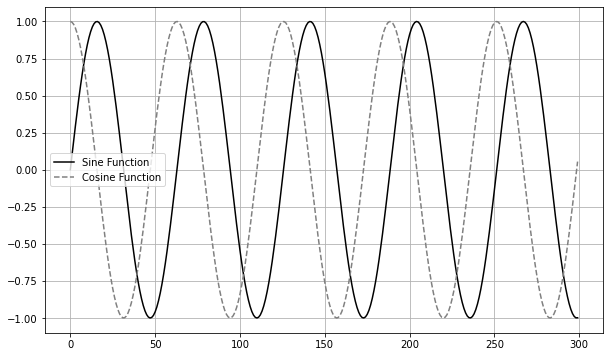

In [25]:
data_range = np.arange(0,30,0.1)

sine = np.sin(data_range)
cosine = np.cos(data_range)

plt.figure(figsize=(10,6))

plt.plot(sine,color = "black",label = "Sine Function")
plt.plot(cosine,color = "grey",linestyle = "dashed",label = "Cosine Function")
plt.grid()
plt.legend()
plt.show()

In [26]:
#conda install minepy

In [27]:
#from scipy.stats import spearmanr
#from minepy import MINE

#X = cpi_us["CPIAUCSL"].values #getting values as np arrays

#Y = cpi_uk["GBRCPIALLMINMEI"].values

#mine = MINE()
#mic_score = mine.mic() # mic score implementing

#comparison between pearson, spearman and mic

#pearson_r = np.corrcoef(X,Y)

### Stationarity Problem

It is the most important part of a time series analysis. Because in real world we will experience so many data that are not stationary. Stationary basically means that the mean, variance and covarience of a time series is constant over time. If the mean is changing in different time stamps then we can not predict the future values. And our goal is always try to predict future. So we need stationary data. We can detect stationary with looking at plots but better way is to use test.

For example **ADF Tests** : It is for sets tht can be stationary with differencing. The null hypothesis is that datais non stationary a.k.a data exhibits unit roots. If the coeffficient of the lagged value is negative then it means past values are good indicators for future values.

Another tests that we use to look for stationarity are **The Schmidt-Phlips** and **Phlips-Perron** Tests; those are basically do the same thing with ADF, the difference is PP Test can also handle heteroscedasticity and complex autocorrelations.

The last one is **KPSS Test**, it reverse the hypothesis. So its null hypotheisis is data is stationary unlike ADF and other tests. So this KPSS Test is not a unit root test.

In [28]:
from statsmodels.tsa.stattools import adfuller

cpi_uk_n = cpi_uk.dropna()
cpi_us_n = cpi_us.dropna()

print("ADF Test p-value of UK Data:" ,adfuller(cpi_uk_n["GBRCPIALLMINMEI"])[1])
print("ADF Test p-value of US Data: ", adfuller(cpi_us_n["CPIAUCSL"])[1])

ADF Test p-value of UK Data: 0.534911885075587
ADF Test p-value of US Data:  0.0956395170610681


Our null hypothesis is that data is non stationary. In both cases we fail to reject null hypotheisis at the 5% level. So both data sets are non-satationary. This is something we would have been concluded without even looking at the adf tests because those are dailiy/monthly stock prices data set. We have to make it non stationary. Best and easiest way is **differecing**.

In [29]:
cpi_uk_diff = cpi_uk_n.diff().dropna()

cpi_uk_diff.head()

,GBRCPIALLMINMEI
DATE,
1996-02-01,0.143377
1996-03-01,-0.165352
1996-04-01,-0.017342
1996-05-01,-0.012870
1996-06-01,-0.004264


In [30]:
print("ADF Test p-value of Differenced UK Data:" ,adfuller(cpi_uk_diff["GBRCPIALLMINMEI"])[1])

ADF Test p-value of Differenced UK Data: 2.670133913190728e-05


In [31]:
def Augmented_Dickey_Fuller_Test_f(series):
    #print(f"Results of Dickey-Fuller Test for column: {column_name}")
    dftest1 = adfuller(series,autolag="AIC",regression="ct")
    dfoutput = pd.Series(dftest1[0:4],index=["Test Statistics","p-value","No lags used","Number of Obs. Used"])
    critical_values = dftest1[4]
    for key, value in critical_values.items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)
    
    if dftest1[1] <=0.05:
        print("Conclusion ===>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion ===>")
        print("Fail to reject null hypothesis")
        print("Data is non-stationary")
        
Augmented_Dickey_Fuller_Test_f(cpi_uk_n["GBRCPIALLMINMEI"])

Test Statistics          -1.611067
p-value                   0.788069
No lags used             12.000000
Number of Obs. Used     311.000000
Critical Value (1%)      -3.988178
Critical Value (5%)      -3.424702
Critical Value (10%)     -3.135405
dtype: float64
Conclusion ===>
Fail to reject null hypothesis
Data is non-stationary


This value is basically zero, so we reject null hypothesis; which is data is non-stationary. Here now differenced data is stationary. If we use something like ARIMA process then we dont have to do this. We just look for the autoarima function and it will work out itself and find the best possible outcome for us.

We will conduct a stepwise model,it will give us the lowest AIC score. **AIC Score** is a mathematical method that is used to determine which model is better for machine learning.

In [51]:
len(cpi_uk)*0.2

train = cpi_uk.iloc[:-68].dropna()
test = cpi_uk.iloc[-68:]


In [52]:
train

,GBRCPIALLMINMEI
DATE,
1996-01-01,2.900763
1996-02-01,3.044140
1996-03-01,2.878788
1996-04-01,2.861446
1996-05-01,2.848576
...,...
2016-12-01,1.792829
2017-01-01,1.901902
2017-02-01,2.297702


In [53]:
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics

stepwise_model = auto_arima(train,start_p =1,start_q=1,max_q=3,max_p=3,seasonal=False,d=None,
                          trace=True,error_action="ignore",suppress_warnings=True,stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-17.548, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1128.454, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-19.952, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=567.768, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-18.561, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-18.565, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=398.784, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-26.491, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=239.895, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.993, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-26.371, Time=0.62 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  256
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  18.246
Date:                Wed, 17 Dec 2025   AIC                            -26.491
Time:                        17:23:51   BIC                             -8.765
Sample:                    01-01-1996   HQIC                           -19.362
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1167      0.046      2.542      0.011       0.027       0.207
ar.L1          0.9444      0.019     49.513      0.000       0.907       0.982
ma.L1          0.1171      0.061      1.905      0.057      -0.003       0.238
ma.L2          0.1501      0.057      2.639      0.008       0.039       0.262
sigma2         0.0502      0.005     11.087      0.000       0.041       0.059
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.85   Prob(JB):                         0.56
Heteroskedasticity (H):               1.15   Skew:                             0.17
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
train1 = cpi_uk_n[:-68]
test1 = cpi_uk_n[-68:]

stepwise_model1 = auto_arima(train1,start_p=1,start_q=1,max_p=3,max_q=3,seasonal=False,
                            d=None,trace=True,error_action = "ignore",suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-17.548, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1128.454, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-19.952, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=567.768, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-18.561, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-18.565, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=398.784, Time=0.82 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-26.491, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=239.895, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22.993, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-26.371, Time=0.74 s

In [55]:
train2=cpi_uk_diff[:-68]
test2=cpi_uk_diff[-68:]

In [56]:
stepwise_model2 = auto_arima(train2,start_p=1,start_q=1,max_p=3,max_q=3,seasonal=False,
                            d=None,trace=True,error_action = "ignore",suppress_warnings=True,stepwise=True)
stepwise_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24.899, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-22.818, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-24.333, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-23.631, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-24.203, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-24.349, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-25.854, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-24.385, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-23.857, Time=0.16 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.714 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  255
Model:               SARIMAX(0, 0, 2)   Log Likelihood                  15.927
Date:                Wed, 17 Dec 2025   AIC                            -25.854
Time:                        17:25:08   BIC                            -15.230
Sample:                    02-01-1996   HQIC                           -21.581
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0948      0.057      1.651      0.099      -0.018       0.207
ma.L2          0.1298      0.053      2.433      0.015       0.025       0.234
sigma2         0.0517      0.005     11.471      0.000       0.043       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.92   Prob(JB):                         0.95
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Conclusion

First two models are basically same. So SARIMAX(1,0,2) means that;

AR(1) -> This means that we should have use 1st lag values in the model

I(0) -> This says the series is stationary, but actually its not. We will use it as 1 when we manually fit the model.

MA(2) -> This is basically says that model is affected by the 2 lagged values of residuals.

And S means there is seasonality component, X is the exogenous variables like interest rates, international trade, prices of other stocks etc..

Second one which is non-stationary series gave us a model that is SARIMAX(0,0,2):

So there is no effect of the past values in the model because AR(0), and the MA(2) so only thing matter here is the past2 values of residuals and exogenous variables.

In [37]:
cpi_uk_diff.head()

,GBRCPIALLMINMEI
DATE,
1996-02-01,0.143377
1996-03-01,-0.165352
1996-04-01,-0.017342
1996-05-01,-0.012870
1996-06-01,-0.004264


In [83]:
#fitting the model
from statsmodels.tsa.arima.model import ARIMA

order = (1,0,2)
print(f"Fitting ARIMA {order} Model")

model_arima = ARIMA(train,order= order)

model_fit = model_arima.fit()

print(model_fit.summary())

Fitting ARIMA (1, 0, 2) Model


C:\Users\Aleyna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aleyna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aleyna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        GBRCPIALLMINMEI   No. Observations:                  256
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  18.246
Date:                Wed, 17 Dec 2025   AIC                            -26.491
Time:                        17:41:22   BIC                             -8.765
Sample:                    01-01-1996   HQIC                           -19.362
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0984      0.307      6.833      0.000       1.496       2.700
ar.L1          0.9444      0.019     49.512      0.000       0.907       0.982
ma.L1          0.1171      0.061      1.905      0.0

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def time_series_evaluation_metrics_f(y_true,y_pred):
    def mean_absolute_percentage_error(y_true,y_pred):
        y_true,y_pred = np.array(y_true),np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true)) * 100
    print("Evaluation metric results:-")
    print(f"MSE is : {mean_squared_error(y_true,y_pred)}")
    print(f"MAE is : {mean_absolute_error(y_true,y_pred)}")
    print(f"RMSE is : {np.sqrt(mean_squared_error(y_true,y_pred))}")
    print(f"MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}")
    print(f"R2 is : {r2_score(y_true,y_pred)}",end = "\n\n")

In [85]:
forecast_steps = len(test)
start_index = len(train)

end_index = start_index + forecast_steps -1

forecast_result = model_fit.predict(start=start_index,end = end_index)

forecast_series = pd.Series(forecast_result.values,index=test.index)

print("Model Performance on test set")
time_series_evaluation_metrics_f(test,forecast_series)

Model Performance on test set
Evaluation metric results:-
MSE is : 6.9774097793570204
MAE is : 1.5511261515254027
RMSE is : 2.641478710752184
MAPE is : 61.0024963266952
R2 is : -0.1395152642938613



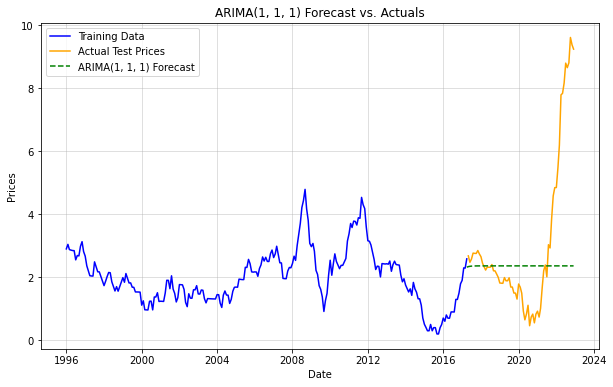

In [109]:
plt.figure(figsize=(10,6))
# Plot the training data
plt.plot(train, label='Training Data', color='blue')

# Plot the actual test data
plt.plot(test, label='Actual Test Prices', color='orange')

# Plot the ARIMA forecast
plt.plot(forecast_series, label=f'ARIMA{order} Forecast', color='green', linestyle='--')

plt.title(f'ARIMA{order} Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()


Unfortunately my model is not good. But it is good. Because this means that i can learn how to make it better. Never be unhappy if you fail. Failure will teach you more than success. 

So I will create an SARIMAX(1,1,1) model with a dummy variable and see the results.

In [93]:
import warnings
warnings.filterwarnings('ignore')
cpi_uk_n['pandemic_shock'] = (cpi_uk_n.index >= '2020-01-01').astype(int)

train3 =cpi_uk_n[cpi_uk_n.index < '2017-04-01']
test3 = cpi_uk_n[cpi_uk_n.index >= '2017-04-01']

In [98]:
train3

,GBRCPIALLMINMEI,pandemic_shock
DATE,,
1996-01-01,2.900763,0
1996-02-01,3.044140,0
1996-03-01,2.878788,0
1996-04-01,2.861446,0
1996-05-01,2.848576,0
...,...,...
2016-11-01,1.495513,0
2016-12-01,1.792829,0
2017-01-01,1.901902,0


In [100]:

y_train = train3['GBRCPIALLMINMEI']

exog_train = train3['pandemic_shock']

order = (1, 1, 1)
print(f"Fitting SARIMAX {order} Model with Exogenous Data")

model_arima = ARIMA(y_train, exog=exog_train, order=order)

model_fit = model_arima.fit()
print(model_fit.summary())

Fitting SARIMAX (1, 1, 1) Model with Exogenous Data
                               SARIMAX Results                                
Dep. Variable:        GBRCPIALLMINMEI   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  15.556
Date:                Wed, 17 Dec 2025   AIC                            -23.111
Time:                        18:05:39   BIC                             -8.962
Sample:                    01-01-1996   HQIC                           -17.419
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
pandemic_shock          0         -0        nan        nan           0           0
ar.L1              0.5827      0.264      2.208      0.027       0.

In [107]:
start_index = len(train3)
forecast_steps = len(test3)
end_index = start_index + forecast_steps - 1

# Extract the dummy variable values for the test/forecast period
exog_test = test3[['pandemic_shock']] 

# Pass the exog values to the predict function
forecast_result = model_fit.predict(
    start=start_index, 
    end=end_index, 
    exog=exog_test
)

forecast_series = pd.Series(forecast_result.values, index=test3.index)

y_true = test3['GBRCPIALLMINMEI']

print("Model Performance on test set")
time_series_evaluation_metrics_f(y_true, forecast_series)



Model Performance on test set
Evaluation metric results:-
MSE is : 6.493086119345912
MAE is : 1.56695311157421
RMSE is : 2.5481534724866775
MAPE is : 63.65300606372283
R2 is : -0.07547795966634152



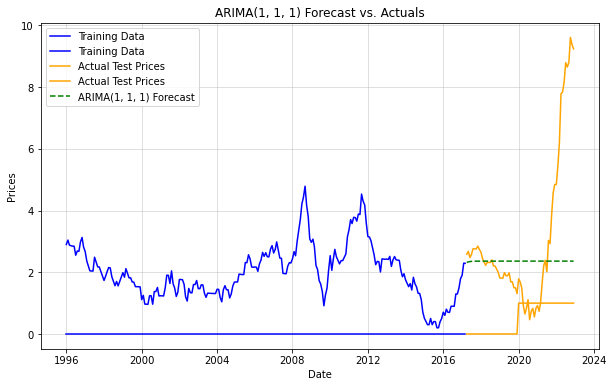

In [108]:
plt.figure(figsize=(10,6))
# Plot the training data
plt.plot(train3, label='Training Data', color='blue')

# Plot the actual test data
plt.plot(test3, label='Actual Test Prices', color='orange')

# Plot the ARIMA forecast
plt.plot(forecast_series, label=f'ARIMA{order} Forecast', color='green', linestyle='--')

plt.title(f'ARIMA{order} Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()


I tried to make thigs right but at the end of the day we migh not have what we were supposed to have in our minds and our wants. So this is not all about the codes because I feel bad that I'm missing someone I shouldn't have because i have self respect. Here we didnt have a great result either so we will use the first one to predict even though its not really good. However, the reason its not good is because after 2020 there is a pandemic and economic recession and after that we had ChatGPT and other AI tools so an economic expansion. The thing i am trying to explain is that maybe our prediction was not so bad if we hadnt those problems. The reason that stock prices increased out of nowhere maybe those, or not. We will never know just like the real thoughts of people about us. Life and coding has some kind of similarities. 